Fig. 2b

- input: accuracy per individual per maf bin
- get mean and standard error over the individuals

In [1]:
fn_ft = './s0_result/snpbag_ft_omni.tsv'
fn_base = './s0_result/snpbag_base.tsv'
fn_noREF = './s0_result/noREF.tsv'
fn_REF = './s0_result/REF.tsv'

outdir = 's2_result'
import os
os.makedirs(outdir, exist_ok=True)

In [2]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)


In [3]:
import pandas as pd
df_ft = pd.read_csv(fn_ft, sep='\t')
df_ft['method'] = 'SNPBag omni'
df_base = pd.read_csv(fn_base, sep='\t')
df_base['method'] = 'SNPBag base'
df_noREF = pd.read_csv(fn_noREF, sep='\t')
df_noREF['method'] = 'noREF'
df_REF = pd.read_csv(fn_REF, sep='\t')
df_REF['method'] = 'REF'

df_results = pd.concat([df_ft, df_base, df_noREF, df_REF])
df_results['accuracy'] = df_results['accuracy'] * 100
method_order = ['SNPBag omni', 'SNPBag base', 'REF', 'noREF']
palette = ['red', 'brown', 'deepskyblue', 'royalblue']
df_results['method'] = pd.Categorical(df_results['method'], categories=method_order, ordered=True)

# Prepare data for barplot: mean and standard error of accuracy for each method and maf_bin
def standard_error(x):
    return x.std(ddof=1) / (len(x) ** 0.5)

def standard_deviation(x):
    return x.std(ddof=1)

def confidence_interval(x):
    return x.std(ddof=1) * 1.96 / (len(x) ** 0.5)


df_plot = df_results.groupby(['maf_bin', 'method'])['accuracy'].agg(mean='mean', err=standard_error).reset_index()
print(df_plot)

         maf_bin       method       mean       err
0   [0.01, 0.03)  SNPBag omni  98.521904  0.044384
1   [0.01, 0.03)  SNPBag base  98.303266  0.047628
2   [0.01, 0.03)          REF  98.381734  0.051023
3   [0.01, 0.03)        noREF  98.268006  0.052953
4   [0.03, 0.06)  SNPBag omni  98.286019  0.082240
5   [0.03, 0.06)  SNPBag base  98.023647  0.083454
6   [0.03, 0.06)          REF  98.142096  0.089789
7   [0.03, 0.06)        noREF  97.984211  0.095606
8    [0.06, 0.1)  SNPBag omni  97.921229  0.097329
9    [0.06, 0.1)  SNPBag base  97.611613  0.104107
10   [0.06, 0.1)          REF  97.708417  0.108636
11   [0.06, 0.1)        noREF  97.505875  0.117007
12   [0.1, 0.18)  SNPBag omni  97.292539  0.122785
13   [0.1, 0.18)  SNPBag base  96.933382  0.133795
14   [0.1, 0.18)          REF  96.977213  0.133357
15   [0.1, 0.18)        noREF  96.735166  0.144797
16   [0.18, 0.3)  SNPBag omni  96.315381  0.126533
17   [0.18, 0.3)  SNPBag base  95.812106  0.137123
18   [0.18, 0.3)          REF  

/tmp/ipykernel_2698460/3179548499.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_results.groupby(['maf_bin', 'method'])['accuracy'].agg(mean='mean', err=standard_error).reset_index()


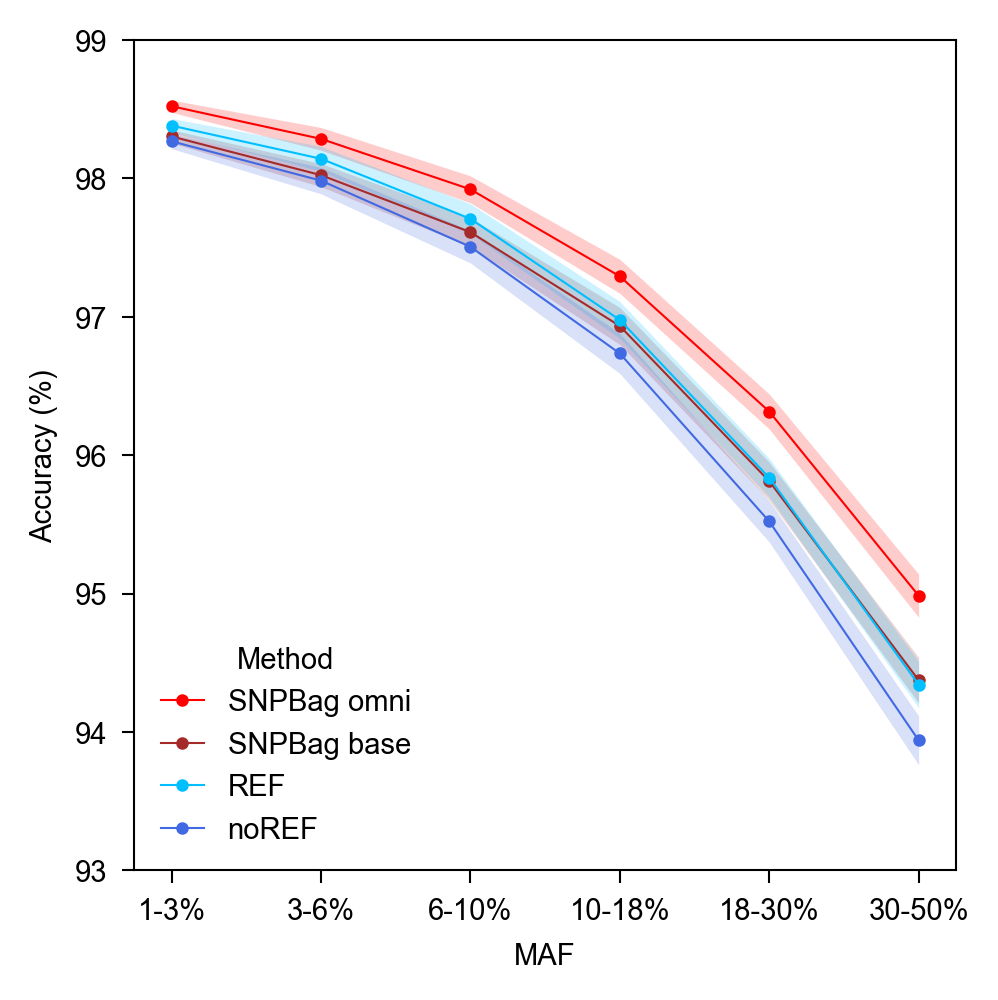

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=figsize)

# Prepare x-axis: use maf_bin as categorical, but for lineplot, we need numeric positions
maf_bins = list(df_plot['maf_bin'].unique())
maf_bin_pos = np.arange(len(maf_bins))
custom_labels = ['1-3%', '3-6%', '6-10%', '10-18%','18-30%','30-50%']

# Plot each method as a separate line with shadow for mean ± se
for idx, method in enumerate(df_plot['method'].cat.categories):
    df_method = df_plot[df_plot['method'] == method]
    # Ensure order matches maf_bins
    df_method = df_method.set_index('maf_bin').reindex(maf_bins).reset_index()
    means = df_method['mean'].values
    ses = df_method['err'].values
    color = palette[idx]
    plt.plot(maf_bin_pos, means, marker='o', label=method, color=color, markersize=2)
    # Plot shadow for mean ± se
    plt.fill_between(
        maf_bin_pos,
        means - ses,
        means + ses,
        color=color,
        alpha=0.2,
        linewidth=0
    )

plt.xlabel('MAF')
plt.ylabel('Accuracy (%)')
# plt.title('Minor Allele Frequency')
plt.xticks(maf_bin_pos, custom_labels, rotation=0)
plt.legend(title='Method', fontsize=fontsize, title_fontsize=fontsize, loc='lower left')
plt.ylim(93, 99)
plt.tight_layout()

plt.savefig(f'{outdir}/maf_comparison_lines.pdf')
plt.show()

/tmp/ipykernel_2698460/556924246.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


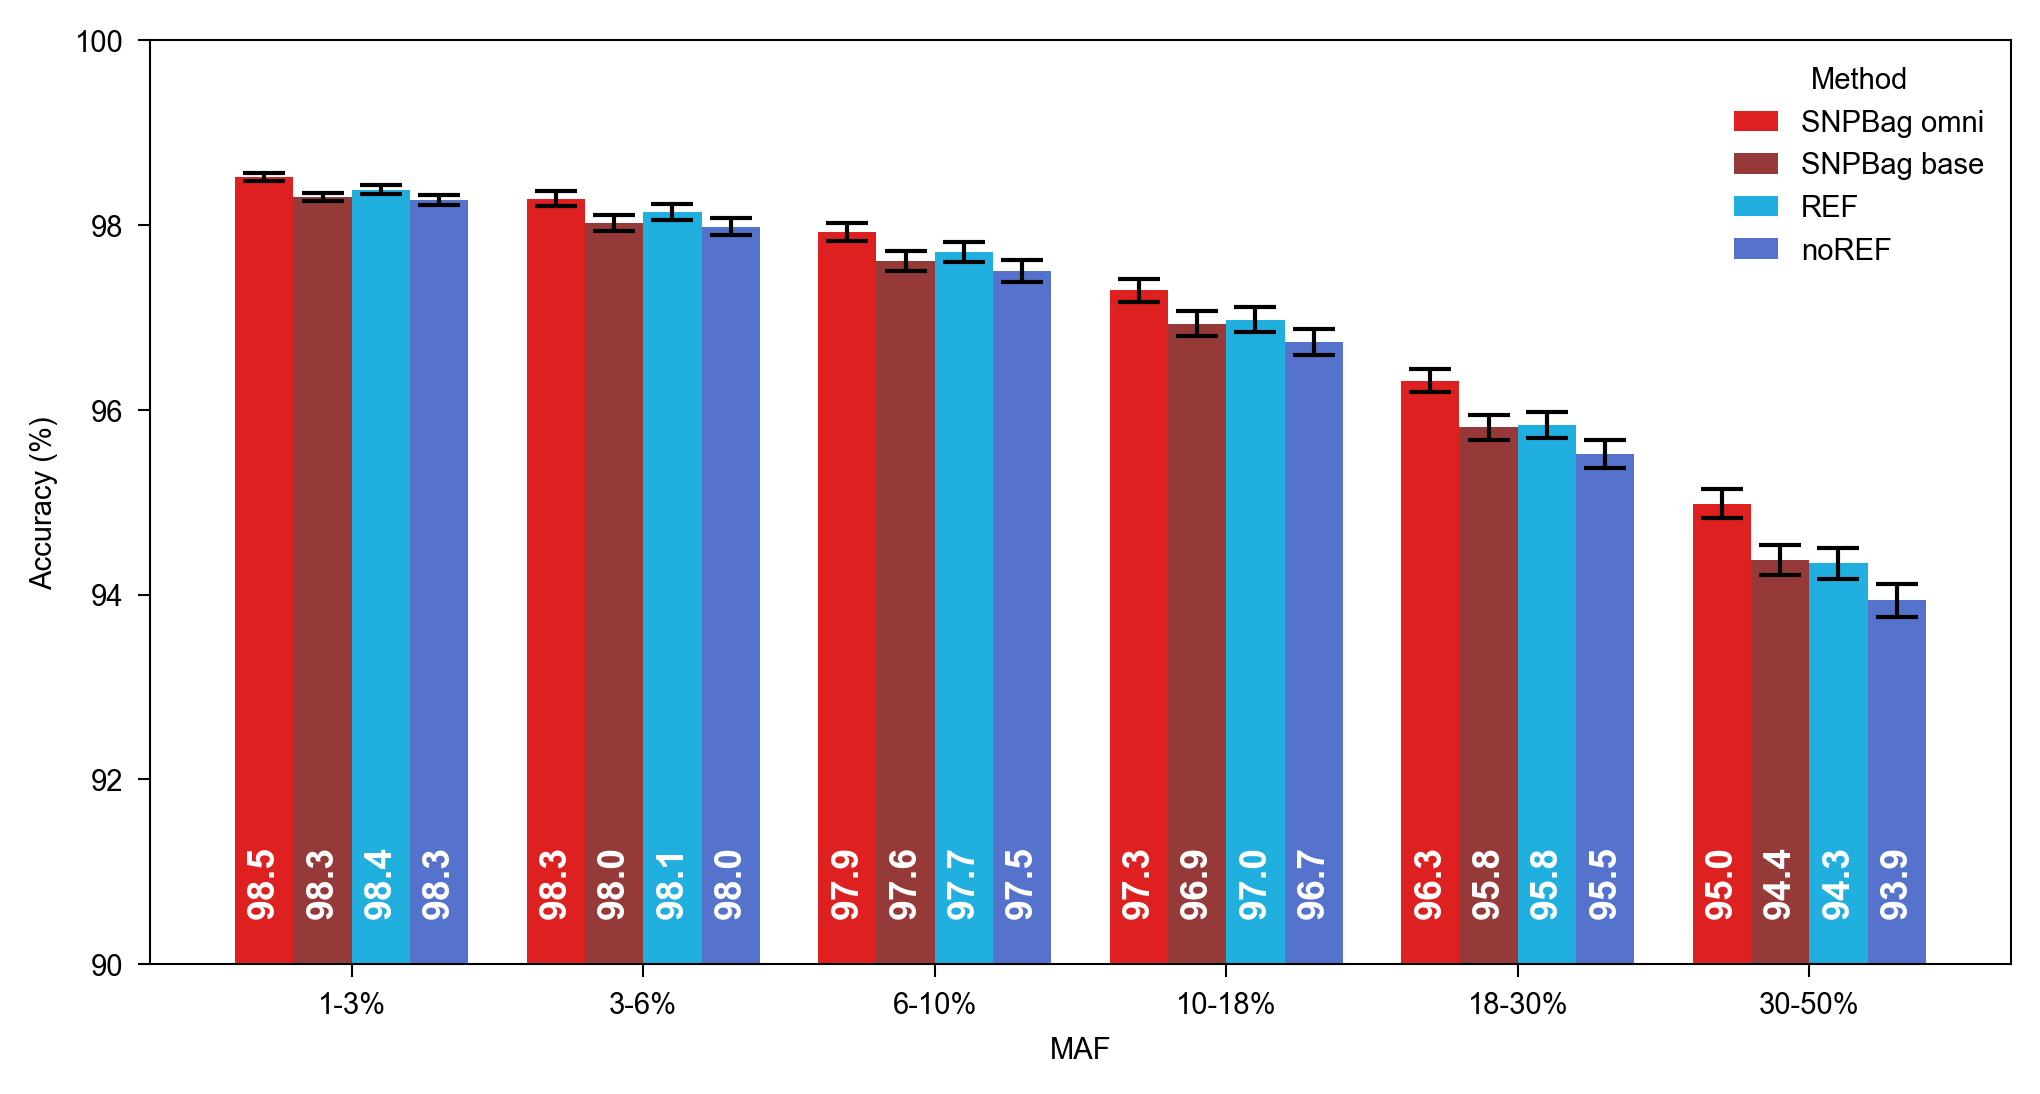

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# Fix: Remove yerr, use errorbar with err_kws as per seaborn 0.15+ recommendations
ax = sns.barplot(
    data=df_plot,
    x='maf_bin',
    y='mean',
    hue='method',
    # hue_order=['snpbag_ft_omni', 'SNPBag_base', 'REF', 'noREF'],
    palette=palette,
    ci=None,
    capsize=0.1,
    errorbar=None,  # disables internal errorbar
    err_kws={'linewidth': 1}
)
# Add error bars manually (using standard error)
for i, (maf_bin, method, mean, err) in df_plot.iterrows():
    # Find the position of the bar
    x_pos = list(df_plot['maf_bin'].unique()).index(maf_bin)
    hue_pos = list(df_plot['method'].unique()).index(method)
    # Get the number of methods for offset
    n_methods = df_plot['method'].nunique()
    # Calculate bar positions as seaborn does
    group_width = 0.8
    bar_width = group_width / n_methods
    offset = (hue_pos - n_methods / 2) * bar_width + bar_width / 2
    plt.errorbar(
        x=x_pos + offset,
        y=mean,
        yerr=err,
        fmt='none',
        c='black',
        capsize=5,
        linewidth=1
    )
    # Add value at the bottom of each bar, in white
    plt.text(
        x=x_pos + offset,
        y=90.5,  # slightly above the bottom y-limit for visibility
        s=f"{mean:.1f}",
        ha='center',
        va='bottom',
        color='white',
        fontsize=9,
        fontweight='bold',
        clip_on=True,
        rotation=90
    )

# plt.tight_layout()
plt.xlabel('MAF')
plt.ylabel('Accuracy (%)')
# plt.title('Minor Allele Frequency')
plt.legend(title='Method')
plt.ylim(90, 100)
plt.xticks(maf_bin_pos, custom_labels, rotation=0)
plt.savefig(f'{outdir}/maf_comparison_bars.pdf')
plt.show()